# Seaborn Visualizations- New York City Bike 2022

## Importing Libraries and data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
from dotenv import load_dotenv 
import os  
load_dotenv() 

True

In [3]:
load_dotenv()

SAVE_PATH = os.getenv("SAVE_PATH")


In [3]:
# Get the full file path from .env
citibike_weather_path = os.getenv("CITIBIKE_2022_WEATHER")

# Columns i want to load
cols = [
    'date', 'month', 'weekday', 'tavg', 'prcp', 'ride_id', 'member_casual',
    'rideable_type', 'duration', 'start_hour', 'end_hour',
    'start_station_name', 'end_station_name'
]

# Read only those columns
citibike_weather_df = pd.read_csv(citibike_weather_path, usecols=cols)

In [5]:
citibike_weather_df.head()

,date,month,weekday,tavg,prcp,ride_id,member_casual,rideable_type,duration,start_hour,end_hour,start_station_name,end_station_name
0,2022-01-01,1,Saturday,11.6,19.3,4A091640AEC83471,member,classic_bike,0 days 00:03:49.904000,16,16,S 4 St & Wythe Ave,Kent Ave & S 11 St
1,2022-01-01,1,Saturday,11.6,19.3,7A560D6287C00126,member,classic_bike,0 days 00:24:53.156000,14,14,Lexington Ave & E 120 St,Amsterdam Ave & W 125 St
2,2022-01-01,1,Saturday,11.6,19.3,4F6F726B809C15E4,member,classic_bike,0 days 00:11:46.612000,12,12,Lexington Ave & E 120 St,Amsterdam Ave & W 125 St
3,2022-01-01,1,Saturday,11.6,19.3,3BC10DC94FD79955,member,classic_bike,0 days 00:25:19.373000,22,23,Cleveland Pl & Spring St,Mott St & Prince St
4,2022-01-01,1,Saturday,11.6,19.3,FE4CE7F1CFFD7952,member,classic_bike,0 days 00:03:15.535000,8,8,Central Park North & Adam Clayton Powell Blvd,E 110 St & Madison Ave


In [6]:
citibike_weather_df.columns

Index(['date', 'month', 'weekday', 'tavg', 'prcp', 'ride_id', 'member_casual',
       'rideable_type', 'duration', 'start_hour', 'end_hour',
       'start_station_name', 'end_station_name'],
      dtype='object')

In [6]:
# converting the date Object to datetime
citibike_weather_df["date"] = pd.to_datetime(citibike_weather_df["date"])

## Top20 Starting Stations in New York through the week

In [7]:
stations = citibike_weather_df.groupby(["start_station_name"])["ride_id"].count().reset_index()
stations.shape

(1641, 2)

In [9]:
Top20_start_stations= stations.nlargest(20, 'ride_id')
Top20.head()

,start_station_name,ride_id
1600,West St & Chambers St,83747
1471,W 21 St & 6 Ave,81113
466,Broadway & W 58 St,72908
280,6 Ave & W 33 St,70250
8,1 Ave & E 68 St,68446


In [10]:
Top20_start_stations.to_csv("Top20_start_stations.csv", index=False)

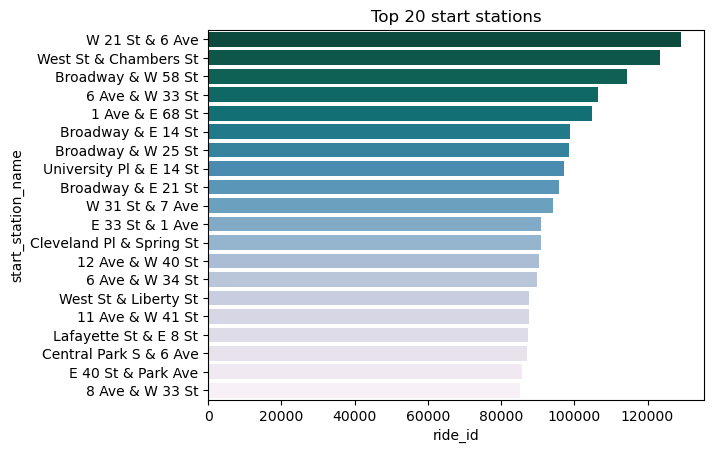

In [10]:
sns.barplot(
    data=Top20_start_stations,
    x='ride_id',
    y='start_station_name',
    hue='start_station_name',   # required for palette
    dodge=False,                # keeps bars single, not grouped
    palette="PuBuGn_r"            
)
plt.legend([], [], frameon=False)  # hide legend
plt.title("Top 20 start stations")

# Save graph
save_path = os.path.join(SAVE_PATH, "Top 20 start stations.png")
plt.savefig(save_path, dpi=600)

plt.show()


### Top20 Starting Stations in New York- Weekday vs. Weekend

In [4]:
weekday_stations = citibike_weather_df.groupby(["weekday","start_station_name"])["ride_id"].count().reset_index()


In [6]:
# Extract the top20 station names as a list
top20_names = weekday_stations["start_station_name"].tolist()


In [7]:
#filter the grouped df to the top20 station names
weekday_top20 = weekday_stations[weekday_stations["start_station_name"].isin(top20_names)]

In [8]:
# reorder the dataframe in pivot to prepare it for plotting as heatmap
pivot1 = weekday_top20.pivot(
    index="start_station_name",
    columns="weekday",
    values="ride_id"
)

In [9]:
# Fix station order (keep Top20 descending order)
pivot1 = pivot1.reindex(index=top20_names)


In [10]:
# Ensure weekday order is correct
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot1 = pivot1.reindex(columns=weekday_order)


In [12]:
pivot1.head()

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_station_name,,,,,,,
1 Ave & E 110 St,1849.0,2023.0,2160.0,2036.0,2200.0,1872.0,1719.0
1 Ave & E 16 St,5935.0,6533.0,6586.0,6782.0,6678.0,6038.0,5402.0
1 Ave & E 18 St,6169.0,6758.0,7184.0,6943.0,7307.0,6664.0,5789.0
1 Ave & E 30 St,4289.0,5015.0,5175.0,4821.0,4486.0,2976.0,2769.0
1 Ave & E 39 St,4624.0,5617.0,5718.0,5564.0,5134.0,4198.0,4069.0


In [15]:
# save pivote to use later in streamlit ploting
pivot1.to_csv("weekday_top20_stations.csv", index=True)

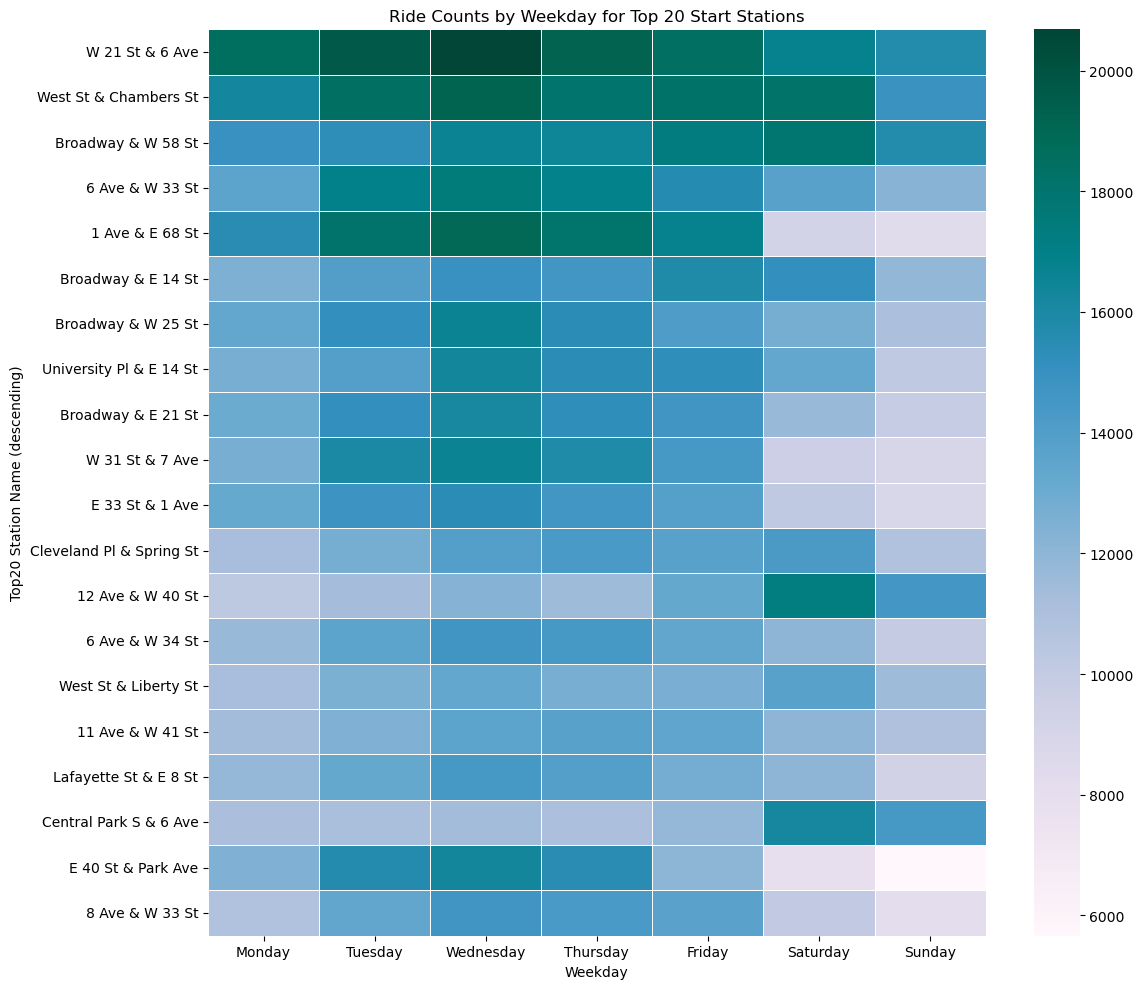

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot1,
    cmap="PuBuGn",    
    linewidths=0.5,
    linecolor="white"
)
plt.title("Ride Counts by Weekday for Top 20 Start Stations")
plt.xlabel("Weekday")
plt.ylabel("Top20 Station Name (descending)")

# Save graph
save_path = os.path.join(SAVE_PATH, "Top20 Stations by Weekday.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


### Rides volume per day and around the clock in New York 2022

In [16]:
weekday_hour = citibike_weather_df.groupby(["weekday","start_hour"])["ride_id"].count().reset_index()


In [17]:
pivot2 = weekday_hour.pivot(
    index="start_hour",
    columns="weekday",
    values="ride_id"
)


In [18]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot2 = pivot2[weekday]


In [19]:
# save pivote to use later in streamlit ploting
pivot2.to_csv("weekday_hour_rides.csv", index=True)

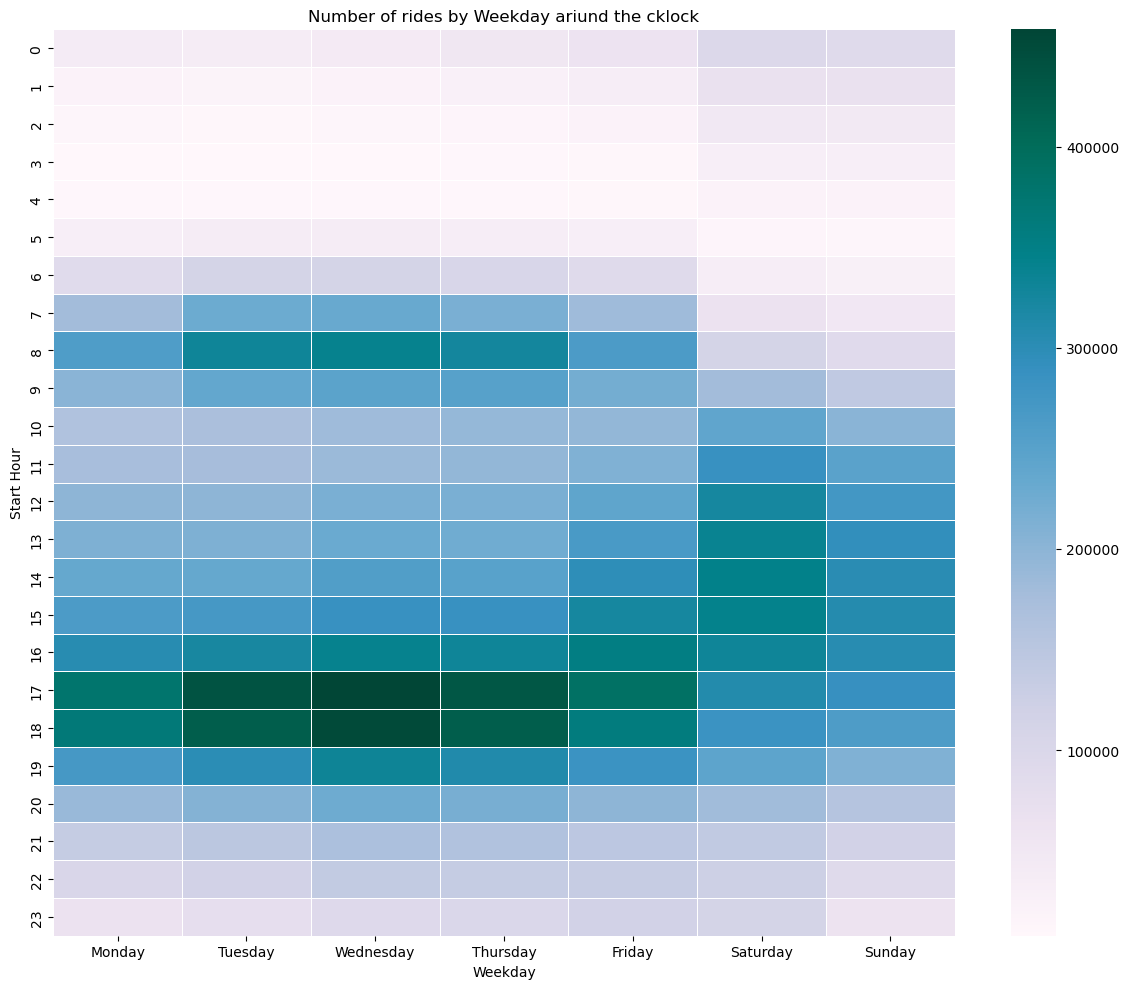

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot2,
    cmap="PuBuGn",    
    linewidths=0.5,
    linecolor="white"
)
plt.title("Number of rides by Weekday ariund the cklock")
plt.xlabel("Weekday")
plt.ylabel("Start Hour")

# Save graph
save_path = os.path.join(SAVE_PATH, "rides by Weekday_hour.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


the heat map shows the volume of rides around the clock over the week days. it shows clear separation between the working days and weekend. also morning and afternoon rush hours.

## Monthly Rides Trend in 2022 vs. Tempratures

In [29]:
# Data aggregation
df_grouped = citibike_weather_df.groupby("date").agg(
    m_ride_count=("ride_id", "count"),
    m_avg_tavg=("tavg", "mean"),
   
)
df_grouped.head()

,m_ride_count,m_avg_tavg
date,,
2022-01-01,20428,11.6
2022-01-02,43009,11.4
2022-01-03,33189,1.4
2022-01-04,36842,-2.7
2022-01-05,34230,3.2


In [30]:
# save pivote to use later in streamlit ploting
df_grouped.to_csv("monthly_rides_temp.csv", index=False)

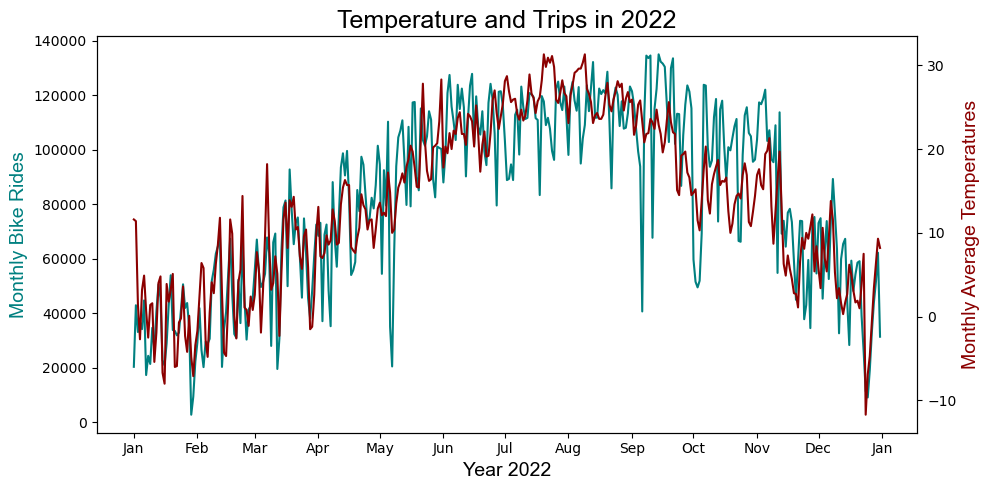

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides
sns.lineplot(data = df_grouped['m_ride_count'], color = "teal")
ax.set_xlabel("Year 2022", fontname="Arial", fontsize=14)
ax.set_ylabel("Monthly Bike Rides", color="teal", fontname="Arial", fontsize=14)

# Second axis for temperature
ax2 = ax.twinx()
sns.lineplot(data = df_grouped['m_avg_tavg'], color="darkred", ax=ax2)
ax2.set_ylabel("Monthly Average Temperatures", color="darkred", fontname="Arial", fontsize=14)
plt.title("Temperature and Trips in 2022", fontname="Arial", fontsize=18)

# --- Force x-axis to show every month ---
import matplotlib.dates as mdates
if hasattr(df_grouped.index, "dtype") and "datetime" in str(df_grouped.index.dtype):
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
else:
    # If index is not datetime (e.g., 0–11)
    ax.set_xticks(range(len(df_grouped)))
    ax.set_xticklabels(df_grouped.index)
    
# Save graph
save_path = os.path.join(SAVE_PATH, "Temperature and Trips in 2022sns.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


## Ride duration Histogramm

In [ ]:
# 1. Convert the column to a proper timedelta
citibike_weather_df["duration"] = pd.to_timedelta(citibike_weather_df["duration"])

In [32]:
citibike_weather_df["duration_min"] = citibike_weather_df["duration"].dt.total_seconds() / 60


In [33]:
# 2. Cleaning the negative and extreme values that were found before in new df to avoid changing the original
duration_df = citibike_weather_df[["duration","rideable_type","start_station_name","end_station_name" ]].copy()
# Remove negative durations:
negative_duration = duration_df[duration_df["duration"] <= pd.Timedelta(0)]
# Remove extremely long durations:
extreme_duration = duration_df[duration_df["duration"] >= pd.Timedelta(hours=2)]

In [39]:
duration_df.shape

(29838166, 4)

In [40]:
duration_df.isna().sum()

duration                  0
rideable_type             0
start_station_name       49
end_station_name      69884
dtype: int64

In [41]:
negative_duration.shape

(357, 4)

In [42]:
negative_duration.isna().sum()

duration              0
rideable_type         0
start_station_name    0
end_station_name      0
dtype: int64

357 rows show negative trip duration, but none of them has missing station names. that means that the negative values is probably due to system miss-registration that is not affected by identifying the station. 

In [44]:
extreme_duration.shape

(169338, 4)

In [43]:
extreme_duration.isna().sum()

duration                  0
rideable_type             0
start_station_name        0
end_station_name      46185
dtype: int64

169,338 rows show extreme duration values more than 2 hours. only 46,185 of them has missing end station name. that means, more than 100,000 trips have more than 2 hours duration despite that the end station name and coordinates are registered. that is probably due to not ending the trip by the customer.

In [34]:
# Remove negative durations:
duration_df = duration_df[duration_df["duration"] >= pd.Timedelta(0)]
# Remove extremely long durations:
duration_df = duration_df[duration_df["duration"] <= pd.Timedelta(hours=2)]

In [35]:
duration_df["duration_min"] = duration_df["duration"].dt.total_seconds() / 60


In [36]:
duration_df.head()

,duration,rideable_type,start_station_name,end_station_name,duration_min
0,0 days 00:03:49.904000,classic_bike,S 4 St & Wythe Ave,Kent Ave & S 11 St,3.831733
1,0 days 00:24:53.156000,classic_bike,Lexington Ave & E 120 St,Amsterdam Ave & W 125 St,24.885933
2,0 days 00:11:46.612000,classic_bike,Lexington Ave & E 120 St,Amsterdam Ave & W 125 St,11.776867
3,0 days 00:25:19.373000,classic_bike,Cleveland Pl & Spring St,Mott St & Prince St,25.322883
4,0 days 00:03:15.535000,classic_bike,Central Park North & Adam Clayton Powell Blvd,E 110 St & Madison Ave,3.258917


In [ ]:
# save pivote to use later in streamlit ploting
duration_df.to_csv("duration_hist.csv", index=False)

In [58]:
duration_df["duration"].describe()

count                     29668471
mean     0 days 00:14:00.777441831
std      0 days 00:12:53.429057190
min         0 days 00:00:08.930000
25%         0 days 00:05:46.516000
50%         0 days 00:10:06.101000
75%         0 days 00:17:47.712000
max         0 days 01:59:59.975000
Name: duration, dtype: object

In [59]:
sns.set_style('darkgrid')

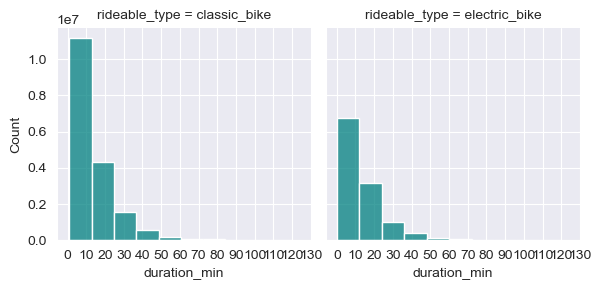

In [61]:
grid = sns.FacetGrid(duration_df, col = "rideable_type")
grid.map_dataframe(sns.histplot, "duration_min", bins = 10, color="#008080")

# Set x‑axis ticks every 10 minutes
for ax in grid.axes.flatten():
    # Determine the range of your data
    xmin, xmax = ax.get_xlim()
    
    # Create ticks every 10 minutes
    ticks = np.arange(0, xmax + 10, 10)
    ax.set_xticks(ticks)

# Save graph
save_path = os.path.join(SAVE_PATH, "Rides duration distribution among Bike Types.png")
plt.savefig(save_path, dpi=600)

plt.show()

In [ ]:
sns.displot(
    data=duration_df,
    x="duration_min",
    col="rideable_type",
    bins=15,
    color="#008080"
)


There are two ways to create FacetGrid-style plots. displot is the more automated and faster option, but it treats the output as a single figure rather than a multi‑plot layout.


## Ride duration Violin Plot among Bike Type

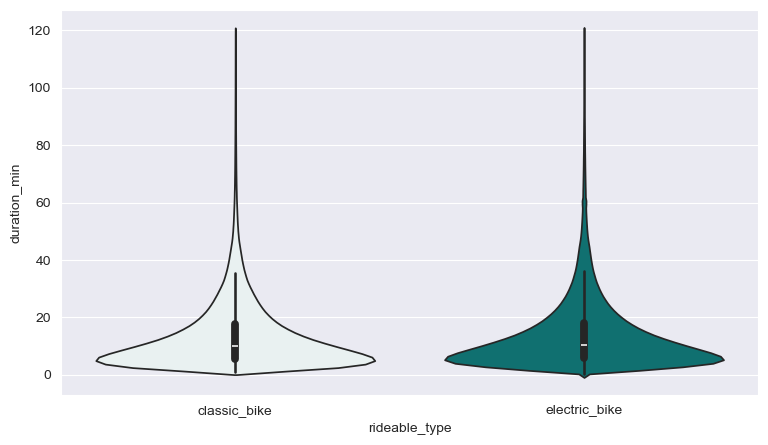

In [62]:
plt.figure(figsize=(9,5))

sns.violinplot(
    data=duration_df,
    x="rideable_type",
    y="duration_min",
    hue="rideable_type",      
    palette="light:teal",    
    dodge=False               # keeps each violin centered
)

plt.legend([], [], frameon=False)   # hide legend

# Save graph
save_path = os.path.join(SAVE_PATH, "Rides duration violinplot among Bike Types.png")
plt.savefig(save_path, dpi=600)

plt.show()


## User Types and Bike types Distribution

In [ ]:
# Step 1: create the users table
users = citibike_weather_df.groupby(["rideable_type", "member_casual"]).size().unstack()

In [ ]:
# save pivote to use later in streamlit ploting
users.to_csv("users_bike_types.csv", index=False)

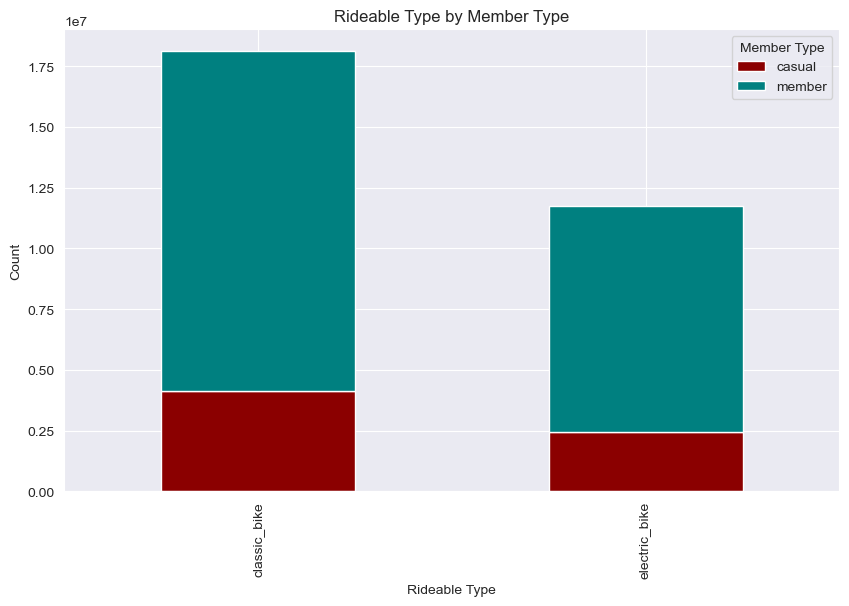

In [65]:
# Step 2: plot stacked bar 
users.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["darkred", "teal"]
)
plt.title("Rideable Type by Member Type")
plt.xlabel("Rideable Type")
plt.ylabel("Count")

# Save graph
save_path = os.path.join(SAVE_PATH, "Rideable Type by Member Type.png")
plt.savefig(save_path, dpi=600)

plt.legend(title="Member Type")
plt.show()